In [12]:
import pandas as pd

# Cargar los datos
df = pd.read_csv(r'C:\Users\rodag\OneDrive\Documentos\GitHub\CompraVentaAutos\data\car_data.csv')

# Mostrar las primeras filas del DataFrame
print(df.head())

# Revisar si hay valores faltantes
print("Valores faltantes por columna:")
print(df.isnull().sum())

# Mostrar información general del DataFrame
print(df.info())


        brand           model                           version     price  \
0  VOLKSWAGEN      ESCARABAJO  1,6 LTS. SEDÁN 2P. T/M MOTOR ACD  12000000   
1        AUDI              Q2                           35 TFSI  27990000   
2      SUBARU        FORESTER                               NaN   5290000   
3        JEEP  GRAND CHEROKEE                               NaN  20590000   
4     M. BENZ             GLA                               200  20500000   

   kilometraje  cylinder         city  region  year fuel_type transmission  \
0         4427       1.6     Vitacura      13  1996  gasolina     mecanico   
1        14800       1.4   Las Condes      13  2023  gasolina   automatico   
2       249890       NaN     Rancagua       6  2008       NaN          NaN   
3       106000       NaN   Las Condes      13  2018       NaN          NaN   
4        57200       1.6  Los Ángeles       8  2019  gasolina   automatico   

   doors   plate                                        description 

In [13]:
# Eliminar columnas con más del 50% de valores faltantes
df_clean = df.dropna(thresh=int(len(df) * 0.5), axis=1)


In [14]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3707 entries, 0 to 3706
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   brand                3707 non-null   object 
 1   model                3707 non-null   object 
 2   version              783 non-null    object 
 3   price                3707 non-null   int64  
 4   kilometraje          3707 non-null   int64  
 5   cylinder             1216 non-null   float64
 6   city                 3707 non-null   object 
 7   region               3707 non-null   int64  
 8   year                 3707 non-null   int64  
 9   fuel_type            1298 non-null   object 
 10  transmission         1287 non-null   object 
 11  doors                1253 non-null   float64
 12  plate                3707 non-null   object 
 13  description          1522 non-null   object 
 14  only_owner           472 non-null    object 
 15  never_bumped         600 non-null    o

In [15]:
print(df_clean.columns)

Index(['brand', 'model', 'price', 'kilometraje', 'city', 'region', 'year',
       'plate', 'state'],
      dtype='object')


In [16]:
print(df_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3707 entries, 0 to 3706
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   brand        3707 non-null   object
 1   model        3707 non-null   object
 2   price        3707 non-null   int64 
 3   kilometraje  3707 non-null   int64 
 4   city         3707 non-null   object
 5   region       3707 non-null   int64 
 6   year         3707 non-null   int64 
 7   plate        3707 non-null   object
 8   state        3707 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 260.8+ KB
None


In [17]:
# Mapeo de regiones basado en los números
region_map = {
    1: "Tarapacá",
    2: "Antofagasta",
    3: "Atacama",
    4: "Coquimbo",
    5: "Valparaíso",
    6: "O'Higgins",
    7: "Maule",
    8: "Biobío",
    9: "La Araucanía",
    10: "Los Lagos",
    11: "Aysén",
    12: "Magallanes",
    13: "Metropolitana",
    14: "Los Ríos",
    15: "Arica y Parinacota",
    16: "Ñuble"
}

# Asignar los nombres de las regiones al DataFrame
df_clean['region_name'] = df_clean['region'].map(region_map)


C:\Users\rodag\AppData\Local\Temp\ipykernel_5352\3256840826.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['region_name'] = df_clean['region'].map(region_map)


In [10]:
import geopandas as gpd

# Cargar el shapefile de las regiones de Chile
shapefile_path = 'C:/Users/rodag/OneDrive/Documentos/GitHub/CompraVentaAutos/gadm41_CHL_shp/gadm41_CHL_1.shp'
mapa_chile = gpd.read_file(shapefile_path)


In [11]:
# Ver los nombres de las regiones en el shapefile
print(mapa_chile['NAME_1'].unique())


['Antofagasta' 'Araucanía' 'Arica y Parinacota' 'Atacama'
 'Aysén del General Ibañez del Cam' 'Bío-Bío' 'Coquimbo'
 "Libertador General Bernardo O'Hi" 'Los Lagos' 'Los Ríos'
 'Magallanes y Antártica Chilena' 'Maule' 'Ñuble' 'Santiago Metropolitan'
 'Tarapacá' 'Valparaíso']


In [18]:
# Mapeo ajustado para los nombres de las regiones del shapefile
adjusted_region_map = {
    'Antofagasta': 'Antofagasta',
    'Araucanía': 'La Araucanía',
    'Arica y Parinacota': 'Arica y Parinacota',
    'Atacama': 'Atacama',
    "Aysén del General Ibañez del Cam": "Aysén",
    'Bío-Bío': 'Biobío',
    'Coquimbo': 'Coquimbo',
    "Libertador General Bernardo O'Hi": "O'Higgins",
    'Los Lagos': 'Los Lagos',
    'Los Ríos': 'Los Ríos',
    'Magallanes y Antártica Chilena': 'Magallanes',
    'Maule': 'Maule',
    'Ñuble': 'Ñuble',
    'Santiago Metropolitan': 'Metropolitana',
    'Tarapacá': 'Tarapacá',
    'Valparaíso': 'Valparaíso'
}

# Aplicar el mapeo ajustado al GeoDataFrame del shapefile
mapa_chile['region_name'] = mapa_chile['NAME_1'].map(adjusted_region_map)


<Figure size 1000x1000 with 0 Axes>

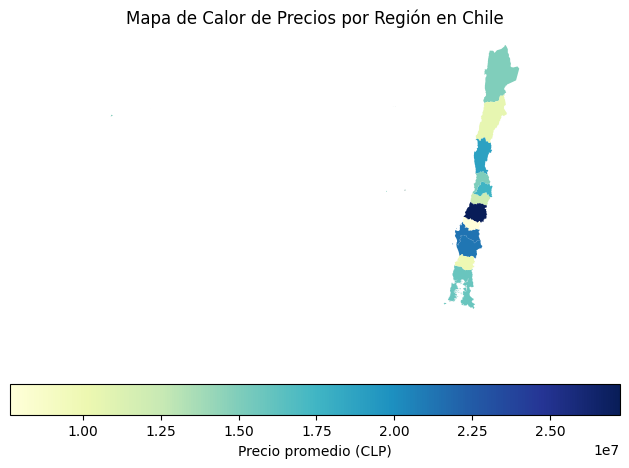

In [19]:
import matplotlib.pyplot as plt

# Agrupar por región y calcular el precio promedio
region_price_avg = df_clean.groupby('region_name')['price'].mean().reset_index()

# Combinar el mapa con los datos de precios por región
mapa_chile = mapa_chile.merge(region_price_avg, on='region_name')

# Crear el mapa de calor
plt.figure(figsize=(10, 10))
mapa_chile.plot(column='price', cmap='YlGnBu', legend=True, legend_kwds={'label': "Precio promedio (CLP)", 'orientation': "horizontal"})
plt.title('Mapa de Calor de Precios por Región en Chile')
plt.axis('off')  # Quitar los ejes
plt.tight_layout()
plt.show()


C:\Users\rodag\AppData\Local\Temp\ipykernel_5352\524946755.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region_name', y='price', data=region_price_avg, palette='viridis')


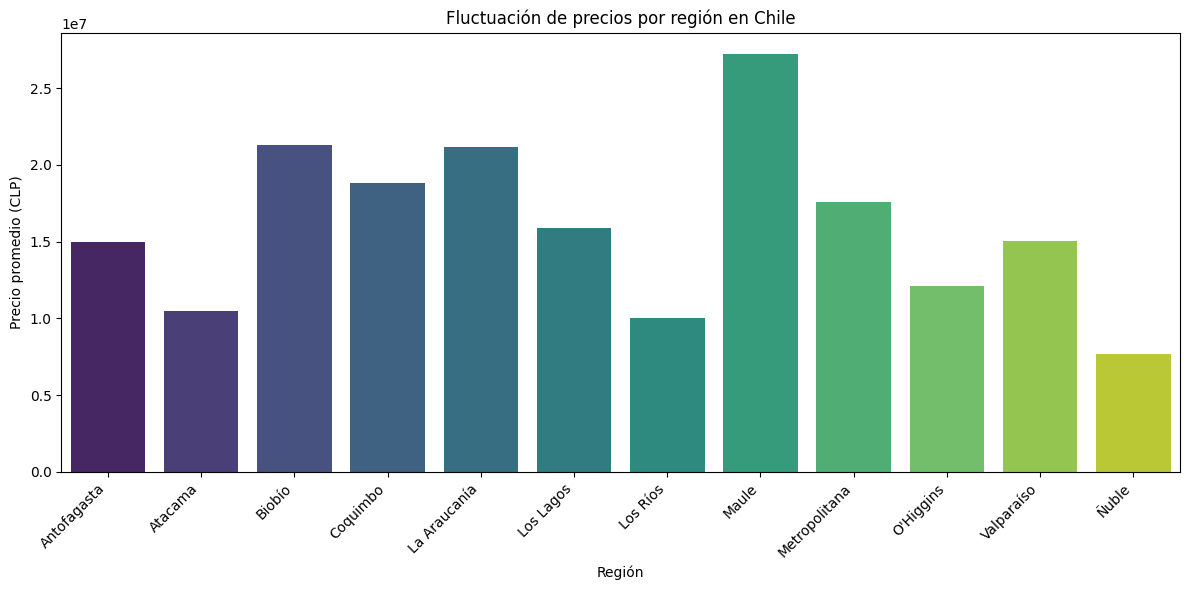

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar por región y calcular el precio promedio
region_price_avg = df_clean.groupby('region_name')['price'].mean().reset_index()

# Crear un gráfico de barras para la fluctuación de precios por región
plt.figure(figsize=(12, 6))
sns.barplot(x='region_name', y='price', data=region_price_avg, palette='viridis')
plt.title('Fluctuación de precios por región en Chile')
plt.xlabel('Región')
plt.ylabel('Precio promedio (CLP)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Cargar el shapefile de las regiones de Chile
shapefile_path = 'C:/Users/rodag/OneDrive/Documentos/GitHub/CompraVentaAutos/gadm41_CHL_shp/gadm41_CHL_1.shp'
mapa_chile = gpd.read_file(shapefile_path)

# Mapeo de nombres de las regiones (si es necesario)
mapa_chile['region_name'] = mapa_chile['NAME_1'].map(region_map)

# Agrupar por región y calcular el precio promedio
region_price_avg = df_filtered.groupby('region_name')['price'].mean().reset_index()

# Combinar el mapa con los datos de precios por región
mapa_chile = mapa_chile.merge(region_price_avg, on='region_name')

# Crear el mapa de calor
plt.figure(figsize=(10, 10))
mapa_chile.plot(column='price', cmap='YlGnBu', legend=True, legend_kwds={'label': "Precio promedio (CLP)", 'orientation': "horizontal"})
plt.title('Mapa de Calor de Precios por Región en Chile')
plt.axis('off')  # Quitar los ejes
plt.tight_layout()
plt.show()


RMSE en cada fold: [4691643.98184126 4494170.19341209 4254349.9102384  4442909.08588999
 4443195.62530567]
RMSE promedio: 4465253.759337483
Desviación estándar del RMSE: 139681.7613564137


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 1. Cargar el DataFrame (en tu caso, ya lo tienes cargado)
# df_clean = pd.read_csv(r'C:\Users\rodag\OneDrive\Documentos\GitHub\CompraVentaAutos\data\car_data.csv')

# 2. Convertir las variables categóricas a variables numéricas con get_dummies
df_clean_encoded = pd.get_dummies(df_clean, drop_first=True)

# 3. Definir las características (X) y la variable objetivo (y)
X = df_clean_encoded.drop('price', axis=1)  # Variables predictoras
y = df_clean_encoded['price']  # Variable objetivo (precio)

# 4. Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# 6. Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# 7. Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f'Error cuadrático medio (MSE): {mse}')
print(f'Raíz del error cuadrático medio (RMSE): {rmse}')


Error cuadrático medio (MSE): 18069195491570.75
Raíz del error cuadrático medio (RMSE): 4250787.631906674


In [10]:
from sklearn.preprocessing import StandardScaler

# Escalar las características numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [11]:
from sklearn.ensemble import RandomForestRegressor

# Entrenar un modelo de Random Forest
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train_scaled, y_train)

# Hacer predicciones
y_pred_rf = model_rf.predict(X_test_scaled)

# Evaluar el modelo
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5

print(f'Error cuadrático medio (MSE) con Random Forest: {mse_rf}')
print(f'Raíz del error cuadrático medio (RMSE) con Random Forest: {rmse_rf}')


Error cuadrático medio (MSE) con Random Forest: 33839494705607.35
Raíz del error cuadrático medio (RMSE) con Random Forest: 5817172.397789785


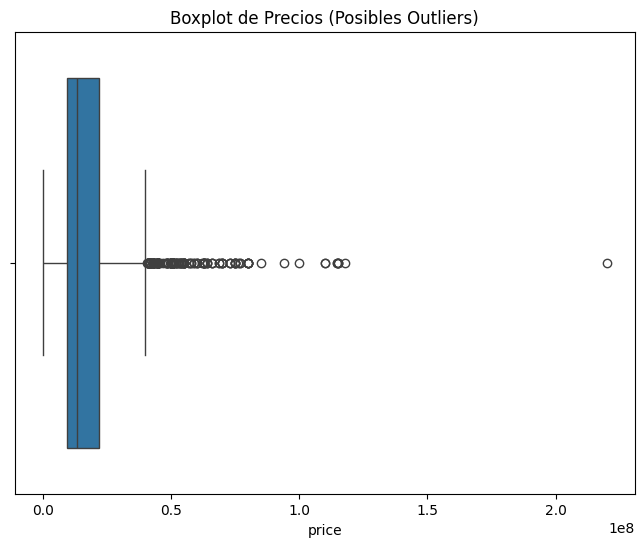

In [12]:
# Boxplot para revisar los outliers en los precios
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x=df_clean['price'])
plt.title('Boxplot de Precios (Posibles Outliers)')
plt.show()

# Puedes eliminar outliers basándote en los percentiles
q1 = df_clean['price'].quantile(0.25)
q3 = df_clean['price'].quantile(0.75)
iqr = q3 - q1  # Rango intercuartílico

# Definir límites
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filtrar los precios que están fuera de los límites (outliers)
df_clean_no_outliers = df_clean[(df_clean['price'] >= lower_bound) & (df_clean['price'] <= upper_bound)]


In [13]:
# Calcular los cuartiles y el rango intercuartílico
q1 = df_clean['price'].quantile(0.25)
q3 = df_clean['price'].quantile(0.75)
iqr = q3 - q1  # Rango intercuartílico

# Definir los límites inferior y superior para identificar outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filtrar los datos para eliminar los precios fuera de estos límites
df_clean_no_outliers = df_clean[(df_clean['price'] >= lower_bound) & (df_clean['price'] <= upper_bound)]

# Verificar el número de registros eliminados
print(f"Registros originales: {len(df_clean)}")
print(f"Registros después de eliminar outliers: {len(df_clean_no_outliers)}")


Registros originales: 3707
Registros después de eliminar outliers: 3503


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Escalar las características numéricas después de eliminar outliers
scaler = StandardScaler()
X = df_clean_no_outliers.drop('price', axis=1)
y = df_clean_no_outliers['price']

# Convertir variables categóricas
X_encoded = pd.get_dummies(X, drop_first=True)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Escalar los datos
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Hacer predicciones
y_pred = model.predict(X_test_scaled)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f'Error cuadrático medio (MSE) después de eliminar outliers: {mse}')
print(f'Raíz del error cuadrático medio (RMSE) después de eliminar outliers: {rmse}')


Error cuadrático medio (MSE) después de eliminar outliers: 19953957482830.66
Raíz del error cuadrático medio (RMSE) después de eliminar outliers: 4466985.279003128


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 1. Cargar el DataFrame (en tu caso, ya lo tienes cargado)
# df_clean = pd.read_csv(r'C:\Users\rodag\OneDrive\Documentos\GitHub\CompraVentaAutos\data\car_data.csv')

# 2. Convertir las variables categóricas a variables numéricas con get_dummies
df_clean_encoded = pd.get_dummies(df_clean, drop_first=True)

# 3. Definir las características (X) y la variable objetivo (y)
X = df_clean_encoded.drop('price', axis=1)  # Variables predictoras
y = df_clean_encoded['price']  # Variable objetivo (precio)

# 4. Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# 6. Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# 7. Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f'Error cuadrático medio (MSE): {mse}')
print(f'Raíz del error cuadrático medio (RMSE): {rmse}')


Error cuadrático medio (MSE): 18069195491570.75
Raíz del error cuadrático medio (RMSE): 4250787.631906674


In [19]:
from sklearn.ensemble import RandomForestRegressor

# Entrenar un modelo de Random Forest
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train_scaled, y_train)

# Hacer predicciones
y_pred_rf = model_rf.predict(X_test_scaled)

# Evaluar el modelo
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5

print(f'Error cuadrático medio (MSE) con Random Forest: {mse_rf}')
print(f'Raíz del error cuadrático medio (RMSE) con Random Forest: {rmse_rf}')


Error cuadrático medio (MSE) con Random Forest: 12577697196656.256
Raíz del error cuadrático medio (RMSE) con Random Forest: 3546504.9269183674


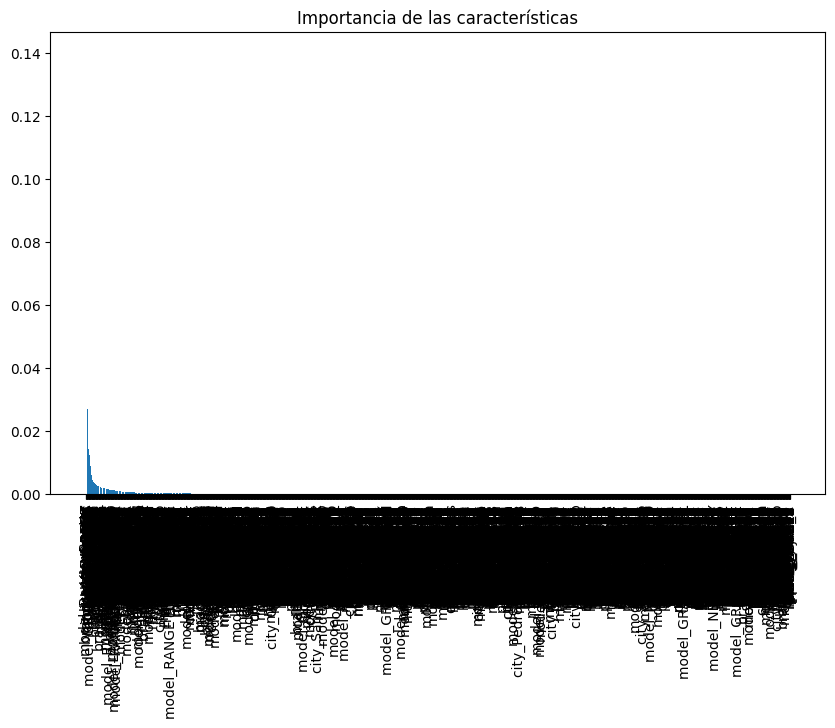

In [17]:
# Importancia de las características en Random Forest
import matplotlib.pyplot as plt
import numpy as np

importances = model_rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X_encoded.columns

plt.figure(figsize=(10, 6))
plt.title("Importancia de las características")
plt.bar(range(X_encoded.shape[1]), importances[indices])
plt.xticks(range(X_encoded.shape[1]), features[indices], rotation=90)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Definir el número de características a mostrar, ajustado al tamaño real de las columnas
num_features = min(20, X.shape[1])  # Usar el número menor entre 20 y el total de características

# Ordenar las importancias y seleccionar las más importantes
indices = np.argsort(importances)[::-1][:num_features]
features = X.columns[indices]

# Crear un gráfico con solo las características más importantes
plt.figure(figsize=(10, 6))
plt.title(f"Top {num_features} características más importantes")
plt.bar(range(num_features), importances[indices], align="center")
plt.xticks(range(num_features), features, rotation=90)
plt.tight_layout()
plt.show()



In [22]:
# Revisar la longitud de las importancias y las columnas
print(f"Longitud de las importancias: {len(importances)}")
print(f"Longitud de las columnas: {X.shape[1]}")


Longitud de las importancias: 2596
Longitud de las columnas: 8


Index(['kilometraje', 'region', 'year', 'state', 'brand_AUDI', 'brand_BAIC',
       'brand_BMW', 'brand_BRILLIANCE', 'brand_BYD', 'brand_CAN AM',
       ...
       'plate_YH9501', 'plate_YP6334', 'plate_YV2306', 'plate_YX9733',
       'plate_YY1975', 'plate_YYBB11', 'plate_YYYY00', 'plate_YYYY03',
       'plate_ZA7945', 'plate_ZH4857'],
      dtype='object', length=2596)


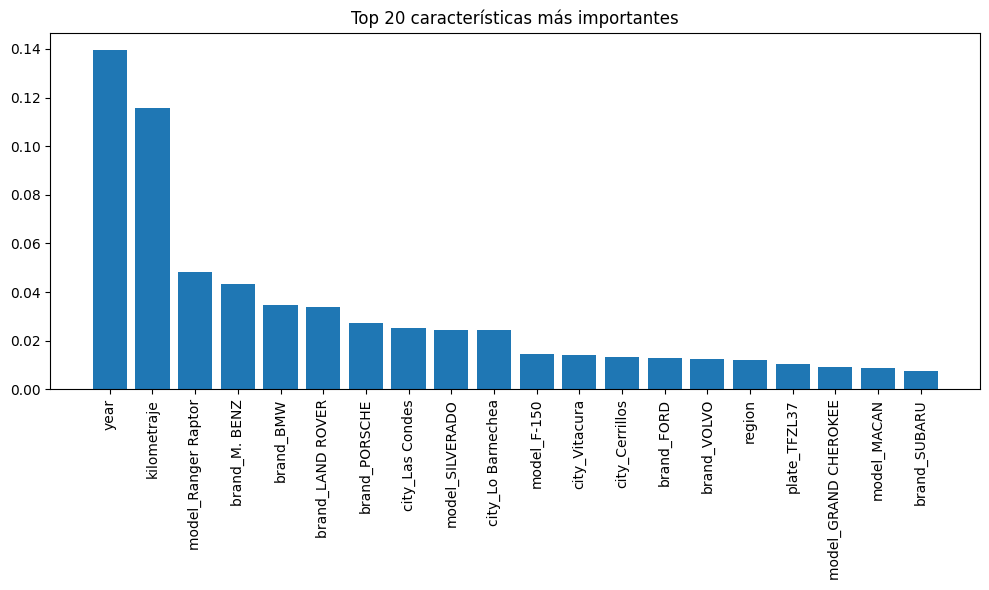

In [23]:
# Imprimir las primeras columnas de X_encoded para verificar la expansión
print(X_encoded.columns)

# Asegúrate de que las características codificadas sean las que usaste en el modelo
num_features = min(20, X_encoded.shape[1])

# Ordenar las importancias y seleccionar solo las más importantes
indices = np.argsort(importances)[::-1][:num_features]
features = X_encoded.columns[indices]

# Crear un gráfico con las características disponibles
plt.figure(figsize=(10, 6))
plt.title(f"Top {num_features} características más importantes")
plt.bar(range(num_features), importances[indices[:num_features]], align="center")
plt.xticks(range(num_features), features, rotation=90)
plt.tight_layout()
plt.show()


In [24]:
# Eliminar la columna 'plate' del DataFrame
df_clean_no_outliers = df_clean_no_outliers.drop('plate', axis=1)

# Confirmar que la columna ha sido eliminada
print(df_clean_no_outliers.columns)


Index(['brand', 'model', 'price', 'kilometraje', 'city', 'region', 'year',
       'state'],
      dtype='object')


Longitud de las importancias: 2596
Longitud de las columnas: 8


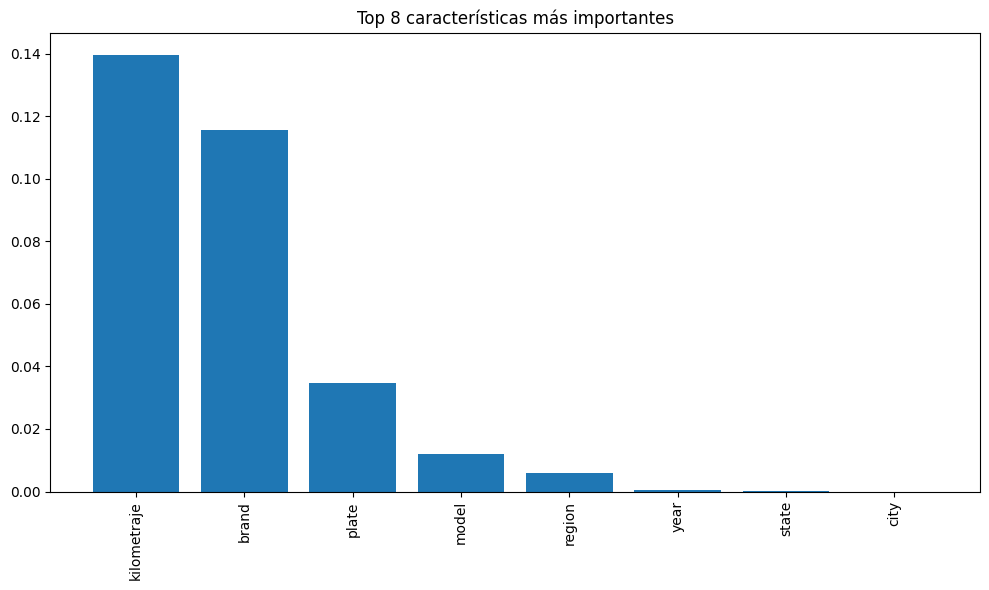

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Revisar el número de características del modelo y el número de columnas
print(f"Longitud de las importancias: {len(importances)}")
print(f"Longitud de las columnas: {len(X.columns)}")

# Verificar si coinciden y ajustar si es necesario
if len(importances) > len(X.columns):
    # Cortar las importancias si son más largas que las columnas
    importances = importances[:len(X.columns)]

# Ordenar las importancias y seleccionar solo las más importantes
num_features = min(20, len(importances))  # Asegurarse de no exceder el número de columnas
indices = np.argsort(importances)[::-1][:num_features]
features = X.columns[indices]

# Crear un gráfico con solo las características más importantes
plt.figure(figsize=(10, 6))
plt.title(f"Top {num_features} características más importantes")
plt.bar(range(num_features), importances[indices], align="center")
plt.xticks(range(num_features), features, rotation=90)
plt.tight_layout()
plt.show()


Error cuadrático medio (MSE) con Random Forest: 11363911648224.238
Raíz del error cuadrático medio (RMSE) con Random Forest: 3371040.1433718107


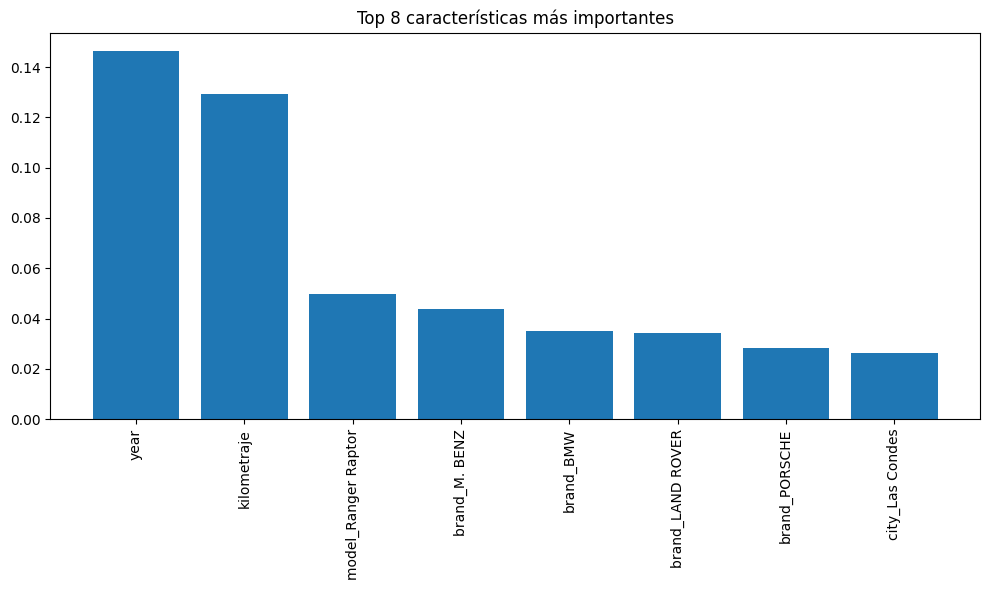

In [29]:


# Codificar las variables categóricas
df_clean_encoded = pd.get_dummies(df_clean_no_outliers, drop_first=True)

# Definir las características (X) y la variable objetivo (y)
X = df_clean_encoded.drop('price', axis=1)
y = df_clean_encoded['price']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar un modelo de Random Forest
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train_scaled, y_train)

# Hacer predicciones
y_pred_rf = model_rf.predict(X_test_scaled)

# Evaluar el modelo
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5

print(f'Error cuadrático medio (MSE) con Random Forest: {mse_rf}')
print(f'Raíz del error cuadrático medio (RMSE) con Random Forest: {rmse_rf}')

# Revisar la importancia de las características nuevamente
importances = model_rf.feature_importances_
indices = np.argsort(importances)[::-1][:num_features]
features = X.columns[indices]

# Gráfico con las características más importantes
plt.figure(figsize=(10, 6))
plt.title(f"Top {num_features} características más importantes")
plt.bar(range(num_features), importances[indices], align="center")
plt.xticks(range(num_features), features, rotation=90)
plt.tight_layout()
plt.show()


In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 1. Agrupar categorías menos frecuentes en "Otros" para 'brand' y 'model'
# Establecer un umbral, por ejemplo, si la categoría aparece en menos del 1% de los datos
brand_counts = df_clean_no_outliers['brand'].value_counts()
brand_threshold = len(df_clean_no_outliers) * 0.01
df_clean_no_outliers['brand'] = df_clean_no_outliers['brand'].apply(
    lambda x: x if brand_counts[x] > brand_threshold else 'Otros'
)

model_counts = df_clean_no_outliers['model'].value_counts()
model_threshold = len(df_clean_no_outliers) * 0.01
df_clean_no_outliers['model'] = df_clean_no_outliers['model'].apply(
    lambda x: x if model_counts[x] > model_threshold else 'Otros'
)

# 2. Codificación ordinal para variables categóricas
# Crear un mapeo para la transmisión (si es que estuviera presente)
# Ejemplo si existiera la columna 'transmission'
# transmission_mapping = {'manual': 0, 'automatic': 1}
# df_clean_no_outliers['transmission'] = df_clean_no_outliers['transmission'].map(transmission_mapping)

# Para columnas sin orden específico, utilizamos LabelEncoder
label_encoder = LabelEncoder()
df_clean_no_outliers['brand'] = label_encoder.fit_transform(df_clean_no_outliers['brand'])
df_clean_no_outliers['model'] = label_encoder.fit_transform(df_clean_no_outliers['model'])
df_clean_no_outliers['city'] = label_encoder.fit_transform(df_clean_no_outliers['city'])

# 3. Eliminar columnas menos importantes o redundantes (ya eliminamos 'plate', por ejemplo)
# Puedes eliminar más columnas según consideres necesario
# df_clean_no_outliers = df_clean_no_outliers.drop(columns=['otra_columna_poco_importante'])

# 4. Continuar con el entrenamiento del modelo
# Codificar las variables restantes si es necesario y definir X e y
X = df_clean_no_outliers.drop('price', axis=1)
y = df_clean_no_outliers['price']

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos numéricos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo de Random Forest
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train_scaled, y_train)

# Hacer predicciones y evaluar
from sklearn.metrics import mean_squared_error
y_pred_rf = model_rf.predict(X_test_scaled)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5

print(f'Error cuadrático medio (MSE) con preprocesamiento mejorado: {mse_rf}')
print(f'Raíz del error cuadrático medio (RMSE) con preprocesamiento mejorado: {rmse_rf}')


Error cuadrático medio (MSE) con preprocesamiento mejorado: 16227865008912.854
Raíz del error cuadrático medio (RMSE) con preprocesamiento mejorado: 4028382.4308167235


In [31]:
from sklearn.ensemble import GradientBoostingRegressor

# Entrenar un modelo de Gradient Boosting
model_gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model_gb.fit(X_train_scaled, y_train)

# Hacer predicciones y evaluar
y_pred_gb = model_gb.predict(X_test_scaled)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = mse_gb ** 0.5

print(f'Error cuadrático medio (MSE) con Gradient Boosting: {mse_gb}')
print(f'Raíz del error cuadrático medio (RMSE) con Gradient Boosting: {rmse_gb}')


Error cuadrático medio (MSE) con Gradient Boosting: 29174924725819.434
Raíz del error cuadrático medio (RMSE) con Gradient Boosting: 5401381.742278492


In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Definir los parámetros a ajustar para Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Crear el modelo Gradient Boosting
gb = GradientBoostingRegressor(random_state=42)

# Configurar GridSearchCV
grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid_gb, cv=5, n_jobs=-1, verbose=2)
grid_search_gb.fit(X_train_scaled, y_train)

# Mejor modelo encontrado
best_gb = grid_search_gb.best_estimator_

# Hacer predicciones con el mejor modelo
y_pred_best_gb = best_gb.predict(X_test_scaled)

# Evaluar el mejor modelo
mse_best_gb = mean_squared_error(y_test, y_pred_best_gb)
rmse_best_gb = mse_best_gb ** 0.5

print(f'Mejor modelo encontrado para Gradient Boosting: {best_gb}')
print(f'Error cuadrático medio (MSE) con Gradient Boosting optimizado: {mse_best_gb}')
print(f'Raíz del error cuadrático medio (RMSE) con Gradient Boosting optimizado: {rmse_best_gb}')


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Mejor modelo encontrado para Gradient Boosting: GradientBoostingRegressor(max_depth=7, n_estimators=200, random_state=42)
Error cuadrático medio (MSE) con Gradient Boosting optimizado: 15215757808206.035
Raíz del error cuadrático medio (RMSE) con Gradient Boosting optimizado: 3900738.1106921337


Pasos a seguir:
Detectar y eliminar outliers en la variable price: Utilizaremos los percentiles para identificar y filtrar valores atípicos.
Opcional: Detectar y eliminar outliers en otras variables importantes, como el kilometraje.
Volver a entrenar el modelo tras eliminar los outliers y verificar el rendimiento.

1. Filtrar outliers en la columna price:
Primero identificaremos los valores extremos en la columna price utilizando los percentiles 1% y 99%.

In [33]:
# Definir los percentiles
lower_percentile_price = df_clean_no_outliers['price'].quantile(0.01)
upper_percentile_price = df_clean_no_outliers['price'].quantile(0.99)

# Filtrar los datos eliminando los outliers en 'price'
df_filtered = df_clean_no_outliers[(df_clean_no_outliers['price'] > lower_percentile_price) &
                                   (df_clean_no_outliers['price'] < upper_percentile_price)]

# Verificar cuántos registros fueron eliminados
print(f"Registros originales: {len(df_clean_no_outliers)}")
print(f"Registros después de eliminar outliers en price: {len(df_filtered)}")


Registros originales: 3503
Registros después de eliminar outliers en price: 3415


2. Filtrar outliers en la columna kilometraje:
Si observamos que el kilometraje también tiene valores extremos, aplicamos el mismo proceso.

In [34]:
# Definir los percentiles para kilometraje
lower_percentile_km = df_filtered['kilometraje'].quantile(0.01)
upper_percentile_km = df_filtered['kilometraje'].quantile(0.99)

# Filtrar los outliers en 'kilometraje'
df_filtered = df_filtered[(df_filtered['kilometraje'] > lower_percentile_km) &
                          (df_filtered['kilometraje'] < upper_percentile_km)]

# Verificar cuántos registros fueron eliminados
print(f"Registros después de eliminar outliers en kilometraje: {len(df_filtered)}")


Registros después de eliminar outliers en kilometraje: 3340


3. Entrenar el modelo nuevamente:
Después de eliminar los outliers, volveremos a entrenar el modelo con el conjunto de datos filtrado y verificaremos si el RMSE mejora.

In [35]:
# Redefinir las características X y la variable objetivo y
X = df_filtered.drop('price', axis=1)
y = df_filtered['price']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos numéricos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo de Gradient Boosting
model_gb = GradientBoostingRegressor(n_estimators=200, max_depth=7, random_state=42)
model_gb.fit(X_train_scaled, y_train)

# Hacer predicciones y evaluar
y_pred_gb = model_gb.predict(X_test_scaled)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = mse_gb ** 0.5

print(f'Error cuadrático medio (MSE) después de eliminar outliers: {mse_gb}')
print(f'Raíz del error cuadrático medio (RMSE) después de eliminar outliers: {rmse_gb}')


Error cuadrático medio (MSE) después de eliminar outliers: 18168291223458.125
Raíz del error cuadrático medio (RMSE) después de eliminar outliers: 4262427.855513583


Ya que los valores del RMSE sigue siendo alto despues de eliminar los outliers, se debe analizar la correlacion entre las caracteristicas

In [36]:
# Calcular la correlación entre las características y el precio en el dataframe filtrado
correlation_matrix = df_filtered.corr()

# Mostrar las correlaciones con el precio, ordenadas de mayor a menor
correlation_price = correlation_matrix['price'].sort_values(ascending=False)
print(correlation_price)


price          1.000000
year           0.282346
region        -0.004134
city          -0.018353
model         -0.060677
brand         -0.090136
kilometraje   -0.297560
state               NaN
Name: price, dtype: float64


Interpretación de las correlaciones:
Año (year) tiene una correlación positiva de 0.28 con el precio, lo que significa que los autos más nuevos tienden a tener precios más altos.
Kilometraje tiene una correlación negativa de -0.29, lo cual tiene sentido: a mayor kilometraje, menor es el precio.
Marca (brand) y modelo (model) tienen correlaciones bajas (-0.09 y -0.06 respectivamente), lo que sugiere que podrían no ser tan relevantes como se esperaba para la predicción del precio.
Región y ciudad tienen correlaciones muy bajas (-0.004 y -0.018), lo que indica que pueden no aportar mucho valor en la predicción.
Estado (state) tiene un valor NaN, lo que sugiere que todos los datos en esa columna podrían ser iguales o estar vacíos.
Recomendaciones basadas en la correlación:
Eliminar las variables con baja correlación: Podrías considerar eliminar region, city, brand, y model, ya que sus correlaciones son muy bajas y probablemente no están aportando valor al modelo.

Mantener variables con correlación más alta: Mantén year y kilometraje, ya que tienen una correlación razonable con el precio y son claramente importantes para la predicción.

Eliminar la columna state: Dado que tiene NaN en la correlación, parece que no está proporcionando información útil y deberíamos eliminarla.

In [37]:
# Eliminar columnas de baja correlación
df_filtered = df_filtered.drop(columns=['region', 'city', 'brand', 'model', 'state'])

# Redefinir las características X y la variable objetivo y
X = df_filtered.drop('price', axis=1)
y = df_filtered['price']

# Continuar con la división de los datos, escalado y entrenamiento del modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos numéricos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo de Gradient Boosting
model_gb = GradientBoostingRegressor(n_estimators=200, max_depth=7, random_state=42)
model_gb.fit(X_train_scaled, y_train)

# Hacer predicciones y evaluar
y_pred_gb = model_gb.predict(X_test_scaled)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = mse_gb ** 0.5

print(f'Error cuadrático medio (MSE) con variables relevantes: {mse_gb}')
print(f'Raíz del error cuadrático medio (RMSE) con variables relevantes: {rmse_gb}')


Error cuadrático medio (MSE) con variables relevantes: 37317238761412.27
Raíz del error cuadrático medio (RMSE) con variables relevantes: 6108783.7383076735


No sirvio eliminar las variables, por lo que se reincorporaran.

In [38]:
# Reincorporar las variables eliminadas previamente
df_filtered = df_clean_no_outliers  # Recuperar el dataframe antes de eliminar las variables

# Crear una nueva variable de interacción entre kilometraje y año
df_filtered['kilometraje_year'] = df_filtered['kilometraje'] * df_filtered['year']

# Redefinir las características X y la variable objetivo y
X = df_filtered.drop('price', axis=1)
y = df_filtered['price']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos numéricos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo de Gradient Boosting
model_gb = GradientBoostingRegressor(n_estimators=200, max_depth=7, random_state=42)
model_gb.fit(X_train_scaled, y_train)

# Hacer predicciones y evaluar
y_pred_gb = model_gb.predict(X_test_scaled)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = mse_gb ** 0.5

print(f'Error cuadrático medio (MSE) con todas las variables y una interacción: {mse_gb}')
print(f'Raíz del error cuadrático medio (RMSE) con todas las variables y una interacción: {rmse_gb}')


Error cuadrático medio (MSE) con todas las variables y una interacción: 14167663006358.006
Raíz del error cuadrático medio (RMSE) con todas las variables y una interacción: 3763995.617207598


Vamos a probar con XGBoost, ya que suele funcionar bien en problemas de regresión.

In [40]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Entrenar un modelo de XGBoost
model_xgb = xgb.XGBRegressor(n_estimators=200, max_depth=7, learning_rate=0.1, random_state=42)
model_xgb.fit(X_train_scaled, y_train)

# Hacer predicciones y evaluar
y_pred_xgb = model_xgb.predict(X_test_scaled)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = mse_xgb ** 0.5

print(f'Error cuadrático medio (MSE) con XGBoost: {mse_xgb}')
print(f'Raíz del error cuadrático medio (RMSE) con XGBoost: {rmse_xgb}')


Error cuadrático medio (MSE) con XGBoost: 15295530574714.062
Raíz del error cuadrático medio (RMSE) con XGBoost: 3910950.085939996


Implementamos validación cruzada con 5 folds

In [41]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Validación cruzada con 5 folds usando el modelo de XGBoost
scores = cross_val_score(model_xgb, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=5)

# Convertir las puntuaciones de error negativo a RMSE
rmse_scores = np.sqrt(-scores)

# Mostrar los resultados
print(f"RMSE en cada fold: {rmse_scores}")
print(f"RMSE promedio: {rmse_scores.mean()}")
print(f"Desviación estándar del RMSE: {rmse_scores.std()}")


RMSE en cada fold: [4691643.98184126 4494170.19341209 4254349.9102384  4442909.08588999
 4443195.62530567]
RMSE promedio: 4465253.759337483
Desviación estándar del RMSE: 139681.7613564137


In [42]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Definir los hiperparámetros a probar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# Crear el modelo XGBoost
xgb_model = xgb.XGBRegressor(random_state=42)

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Ejecutar la búsqueda de los mejores hiperparámetros
grid_search.fit(X_train_scaled, y_train)

# Mejor modelo encontrado
best_model_xgb = grid_search.best_estimator_

# Hacer predicciones con el mejor modelo
y_pred_best_xgb = best_model_xgb.predict(X_test_scaled)

# Evaluar el mejor modelo
mse_best_xgb = mean_squared_error(y_test, y_pred_best_xgb)
rmse_best_xgb = mse_best_xgb ** 0.5

print(f'Mejor modelo encontrado para XGBoost: {best_model_xgb}')
print(f'Error cuadrático medio (MSE) con XGBoost optimizado: {mse_best_xgb}')
print(f'Raíz del error cuadrático medio (RMSE) con XGBoost optimizado: {rmse_best_xgb}')


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Mejor modelo encontrado para XGBoost: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)
Error cuadrático medio (MSE) con XGBoost optimizado: 14695191071011.426
Raíz del error cuadrático medio (RMSE) con XGBoost optimizado: 3833430.7181702694


c:\Users\rodag\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Vamos a agregar transformaciones de características e interacciones entre las variables más importantes para mejorar el rendimiento del modelo. Al crear nuevas variables derivadas de las características existentes, podemos ayudar al modelo a capturar relaciones no lineales o complejas que no se ven claramente con las características individuales.

Proceso para agregar transformaciones e interacciones:
1. Transformaciones: Realizaremos transformaciones como la transformación logarítmica para variables que tienen una gran variabilidad, como kilometraje.
2. Interacciones: Crearemos interacciones entre características importantes, como kilometraje * año.

In [43]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import xgboost as xgb

# 1. Transformación logarítmica del 'kilometraje'
df_filtered['log_kilometraje'] = np.log1p(df_filtered['kilometraje'])  # log(1 + kilometraje)

# 2. Crear una nueva interacción entre 'kilometraje' y 'año'
df_filtered['kilometraje_year'] = df_filtered['kilometraje'] * df_filtered['year']

# 3. Crear una interacción no lineal del 'año'
df_filtered['year_squared'] = df_filtered['year'] ** 2

# Redefinir las características X y la variable objetivo y
X = df_filtered.drop('price', axis=1)
y = df_filtered['price']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos numéricos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo de XGBoost
model_xgb = xgb.XGBRegressor(n_estimators=200, max_depth=7, learning_rate=0.1, random_state=42)
model_xgb.fit(X_train_scaled, y_train)

# Hacer predicciones y evaluar
y_pred_xgb = model_xgb.predict(X_test_scaled)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = mse_xgb ** 0.5

print(f'Error cuadrático medio (MSE) con transformaciones e interacciones: {mse_xgb}')
print(f'Raíz del error cuadrático medio (RMSE) con transformaciones e interacciones: {rmse_xgb}')


Error cuadrático medio (MSE) con transformaciones e interacciones: 15295530574714.062
Raíz del error cuadrático medio (RMSE) con transformaciones e interacciones: 3910950.085939996


In [44]:
# Revisar si hay valores faltantes en el dataframe
print(df_filtered.isnull().sum())

# También revisar si hay valores atípicos o inconsistentes en las variables importantes
print(df_filtered.describe())


brand               0
model               0
price               0
kilometraje         0
city                0
region              0
year                0
state               0
kilometraje_year    0
log_kilometraje     0
year_squared        0
dtype: int64
             brand        model         price    kilometraje         city  \
count  3503.000000  3503.000000  3.503000e+03    3503.000000  3503.000000   
mean     13.973166     6.654867  1.539283e+07   86908.764488    36.619184   
std       8.608223     1.494109  8.505255e+06   59432.777186    20.514596   
min       0.000000     0.000000  1.050000e+05       1.000000     0.000000   
25%       6.000000     7.000000  9.240000e+06   43784.000000    28.000000   
50%      14.000000     7.000000  1.299000e+07   77000.000000    28.000000   
75%      21.000000     7.000000  1.899000e+07  119000.000000    54.000000   
max      28.000000    10.000000  3.999000e+07  650000.000000    75.000000   

            region         year   state  kilometraj

In [45]:
# Filtrar outliers en 'price' y 'kilometraje' utilizando percentiles
lower_percentile_price = df_filtered['price'].quantile(0.01)
upper_percentile_price = df_filtered['price'].quantile(0.99)

lower_percentile_km = df_filtered['kilometraje'].quantile(0.01)
upper_percentile_km = df_filtered['kilometraje'].quantile(0.99)

# Filtrar los outliers
df_filtered = df_filtered[(df_filtered['price'] > lower_percentile_price) & (df_filtered['price'] < upper_percentile_price)]
df_filtered = df_filtered[(df_filtered['kilometraje'] > lower_percentile_km) & (df_filtered['kilometraje'] < upper_percentile_km)]

# Verificar la cantidad de registros después de filtrar
print(f"Registros después de eliminar outliers: {len(df_filtered)}")

# Redefinir las características X y la variable objetivo y
X = df_filtered.drop('price', axis=1)
y = df_filtered['price']

# Continuar con la división de los datos, escalado y entrenamiento del modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos numéricos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo de XGBoost
model_xgb = xgb.XGBRegressor(n_estimators=200, max_depth=7, learning_rate=0.1, random_state=42)
model_xgb.fit(X_train_scaled, y_train)

# Hacer predicciones y evaluar
y_pred_xgb = model_xgb.predict(X_test_scaled)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = mse_xgb ** 0.5

print(f'Error cuadrático medio (MSE) después de eliminar outliers: {mse_xgb}')
print(f'Raíz del error cuadrático medio (RMSE) después de eliminar outliers: {rmse_xgb}')


Registros después de eliminar outliers: 3345
Error cuadrático medio (MSE) después de eliminar outliers: 14812319752589.668
Raíz del error cuadrático medio (RMSE) después de eliminar outliers: 3848677.662858981
